# WEATHER VERİSİ

In [107]:
from pandas import read_csv 
from pandas.tools.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import time

In [108]:
#url = "https://raw.githubusercontent.com/busrasabak/weather.csv/master/weather.csv"
#data = read_csv(url)
file = r"C:\\Users\\PC\\Desktop\\final\\weather.csv"
data1 = read_csv(file)
names = ['Location','Humidity3pm','Cloud9am','Cloud3pm', 'RainToday', 'RISK_MM','RainTomorrow']

data=data1[names]
#droplist=['Evaporation','Sunshine','Date','Location','WindGustDir','WindDir3pm','RainToday','WindDir9am']
#data=data.drop(droplist,axis=1)

In [109]:
data.head()

,Location,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM,RainTomorrow
0,Albury,22.0,8.0,NaN,No,0.0,No
1,Albury,25.0,NaN,NaN,No,0.0,No
2,Albury,30.0,NaN,2.0,No,0.0,No
3,Albury,16.0,NaN,NaN,No,1.0,No
4,Albury,33.0,7.0,8.0,No,0.2,No


In [110]:
data1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [111]:
#data=data.interpolate(method='linear', limit_direction='forward') #Hangı sutunlarda kac tane boş gözlem var onu görüyoruz.
data.isnull().sum()

Location            0
Humidity3pm      3610
Cloud9am        53657
Cloud3pm        57094
RainToday        1406
RISK_MM             0
RainTomorrow        0
dtype: int64

In [112]:
yeni_data = data.dropna()
yeni_data.head()                               #yeni datamızın uzerınden ısleme devam ettık.


,Location,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM,RainTomorrow
4,Albury,33.0,7.0,8.0,No,0.2,No
11,Albury,91.0,8.0,8.0,Yes,15.6,Yes
12,Albury,93.0,8.0,8.0,Yes,3.6,Yes
15,Albury,82.0,8.0,1.0,No,16.8,Yes
16,Albury,65.0,8.0,1.0,Yes,10.6,Yes


In [113]:
yeni_data.isnull().sum() #Eksik veri kaldı mı diye kontrol ettik.

Location        0
Humidity3pm     0
Cloud9am        0
Cloud3pm        0
RainToday       0
RISK_MM         0
RainTomorrow    0
dtype: int64

In [114]:
yeni_data.dtypes

Location         object
Humidity3pm     float64
Cloud9am        float64
Cloud3pm        float64
RainToday        object
RISK_MM         float64
RainTomorrow     object
dtype: object

In [115]:
from sklearn.preprocessing import LabelEncoder #Yes ve No'yu 1 ve 0'a dönüştürmek için kullandık.
for column in yeni_data.columns:
    if yeni_data[column].dtype == type(object):
        le = LabelEncoder()
        yeni_data[column] = le.fit_transform(yeni_data[column])
X1 = yeni_data.iloc[:,4]
X2 = yeni_data.iloc[:,6]

C:\ProgramData\Anacondaa\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [116]:
X=yeni_data.iloc[:,0:6]
Y=yeni_data.iloc[:,-1]

In [117]:
Y.head()

4     0
11    1
12    1
15    1
16    1
Name: RainTomorrow, dtype: int32

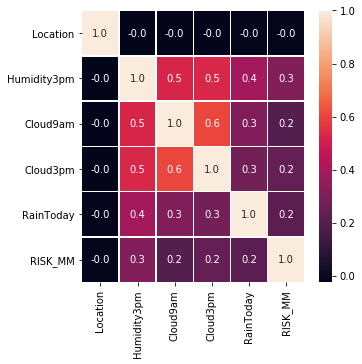

In [118]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [119]:
print(X.shape)

(80555, 6)


In [120]:
print(Y.shape)

(80555,)


In [121]:
yeni_data.dtypes

Location          int32
Humidity3pm     float64
Cloud9am        float64
Cloud3pm        float64
RainToday         int32
RISK_MM         float64
RainTomorrow      int32
dtype: object

In [122]:
print(yeni_data.describe())

           Location   Humidity3pm      Cloud9am      Cloud3pm     RainToday  \
count  80555.000000  80555.000000  80555.000000  80555.000000  80555.000000   
mean      17.991869     51.630253      4.446738      4.509217      0.241773   
std       10.431924     20.832492      2.874359      2.711221      0.428160   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        9.000000     37.000000      1.000000      2.000000      0.000000   
50%       18.000000     52.000000      5.000000      5.000000      0.000000   
75%       27.000000     66.000000      7.000000      7.000000      0.000000   
max       36.000000    100.000000      9.000000      9.000000      1.000000   

            RISK_MM  RainTomorrow  
count  80555.000000  80555.000000  
mean       2.588736      0.238880  
std        9.251214      0.426402  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        1.000000      0.000000  


Yağış Olmayan Günlerin Sayısı:  61312
Yağış Olan Günlerin Sayısı :  19243


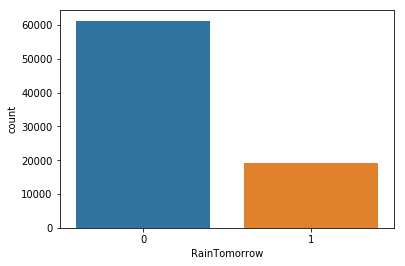

In [123]:
ax = sns.countplot(Y,label="Adet")  
B, M = Y.value_counts()
print('Yağış Olmayan Günlerin Sayısı: ',B)
print('Yağış Olan Günlerin Sayısı : ',M)

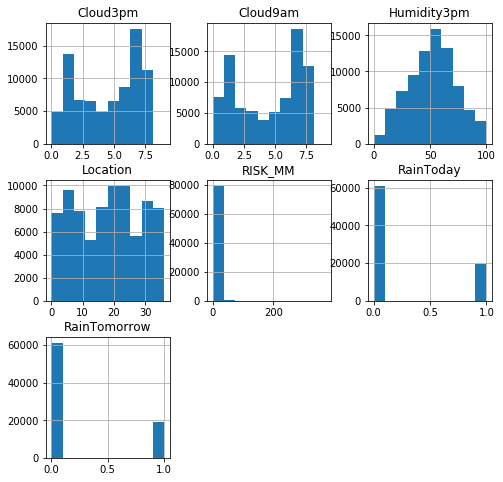

In [124]:
yeni_data.hist(figsize=(8,8)) 
pyplot.show()                 


In [125]:
import seaborn as sns 
sns.pairplot(yeni_dat

SyntaxError: unexpected EOF while parsing (<ipython-input-125-009a33daa30f>, line 2)

In [ ]:
print(Y.values)

In [126]:
yeni_data.head(30)

,Location,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM,RainTomorrow
4,1,33.0,7.0,8.0,0,0.2,0
11,1,91.0,8.0,8.0,1,15.6,1
12,1,93.0,8.0,8.0,1,3.6,1
15,1,82.0,8.0,1.0,0,16.8,1
16,1,65.0,8.0,1.0,1,10.6,1
28,1,70.0,8.0,8.0,1,0.8,0
51,1,39.0,4.0,1.0,0,6.4,1
69,1,31.0,7.0,8.0,0,0.0,0
72,1,69.0,2.0,8.0,0,3.0,1
84,1,14.0,6.0,7.0,0,0.0,0


In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from numpy import set_printoptions 

sc=StandardScaler() 
sc.fit(yeni_data)
rescaledX = sc.transform(yeni_data)
set_printoptions(precision=3) 
print(rescaledX[1:5,:])

[[-1.629  1.89   1.236  1.288  1.771  1.406  1.785]
 [-1.629  1.986  1.236  1.288  1.771  0.109  1.785]
 [-1.629  1.458  1.236 -1.294 -0.565  1.536  1.785]
 [-1.629  0.642  1.236 -1.294  1.771  0.866  1.785]]


C:\ProgramData\Anacondaa\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anacondaa\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  


In [128]:

sc=Normalizer()
sc.fit(yeni_data)
rescaledX = sc.transform(yeni_data)
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.029 0.951 0.202 0.231 0.    0.006 0.   ]
 [0.011 0.978 0.086 0.086 0.011 0.168 0.011]
 [0.011 0.992 0.085 0.085 0.011 0.038 0.011]
 [0.012 0.975 0.095 0.012 0.    0.2   0.012]
 [0.015 0.979 0.121 0.015 0.015 0.16  0.015]]


# ÖZNİTELİK SEÇİMİ

In [129]:
from sklearn.feature_selection import SelectKBest  
from sklearn.feature_selection import chi2          

test = SelectKBest(score_func=chi2, k=6)
fit = test.fit(X, Y)

set_printoptions(precision=3)
print(fit.scores_,'\n',names[0:6])

print('\n')
features = fit.transform(X)
print(features[0:6])

[1.519e+02 1.451e+05 1.594e+04 2.000e+04 6.008e+03 6.245e+05] 
 ['Location', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RISK_MM']


[[ 1.  33.   7.   8.   0.   0.2]
 [ 1.  91.   8.   8.   1.  15.6]
 [ 1.  93.   8.   8.   1.   3.6]
 [ 1.  82.   8.   1.   0.  16.8]
 [ 1.  65.   8.   1.   1.  10.6]
 [ 1.  70.   8.   8.   1.   0.8]]


In [130]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=3)             
fit = pca.fit(X)    
                              
print("varyans açıklama değerleri: %s" % fit.explained_variance_ratio_)
print(fit.components_)

varyans açıklama değerleri: [0.697 0.169 0.117]
[[-1.556e-02  9.808e-01  7.285e-02  6.951e-02  8.049e-03  1.662e-01]
 [ 9.998e-01  1.820e-02 -2.873e-04 -2.462e-03 -1.113e-04 -1.263e-02]
 [ 1.554e-02 -1.678e-01  1.051e-03  1.312e-02  3.750e-03  9.856e-01]]


In [131]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)
print(names[:])

C:\ProgramData\Anacondaa\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.029 0.134 0.049 0.061 0.061 0.666]
['Location', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RISK_MM', 'RainTomorrow']


In [132]:
""""from sklearn.pipeline import FeatureUnion #kesişim alıyormus gıbı düşünüyoruz.(featureunıon)
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
import xgboost as xgb

features = []
features.append(('Temel bileşen analizi', PCA(n_components=5)))
features.append(('öznitelik seç', SelectKBest(k=3)))
feature_union = FeatureUnion(features)
feature_union

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-132-7499744cebe0>, line 10)

In [59]:
""""steps = [('öznitelik seçme', feature_union), ('model',xgb())] #kesımsımden gelen degerlerle modelı kuracak.
model = Pipeline(steps)
model

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-59-8fab8246fbd7>, line 3)

In [60]:
""""kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-60-f9d971ef9f49>, line 3)

# xg boost ve random forest

In [133]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=7, stratify=Y)

In [134]:
import xgboost 
xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=1, max_depth=2, subsample=0.80,n_jobs=3)                            
xgb.fit(x_train, y_train)

pred = xgb.predict(x_test)
pred1= xgb.predict(x_train)

print('eğitim verisi için doğruluk oranı: ',accuracy_score(y_train, pred1)) 
print('\n')
print('test verisi için doğruluk: ',accuracy_score(y_test, pred))

eğitim verisi için doğruluk oranı:  1.0


test verisi için doğruluk:  1.0


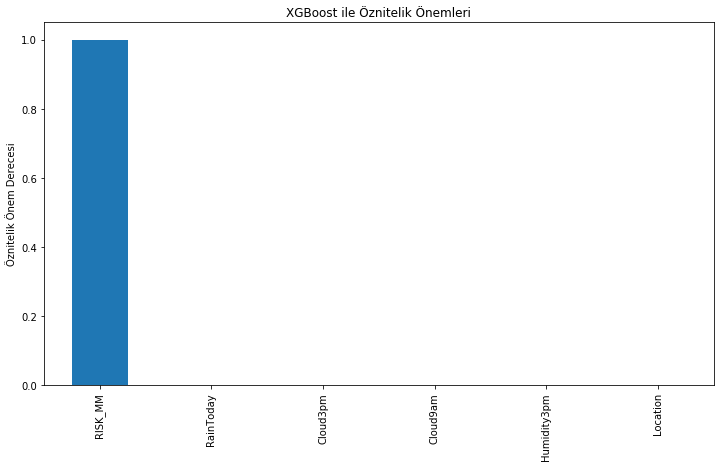

In [135]:
imp_feat_rf = pd.Series(xgb.feature_importances_, index=names[0:6]).sort_values(ascending=False)
imp_feat_rf.plot(kind='bar', title='XGBoost ile Öznitelik Önemleri', figsize=(12,8))
plt.ylabel('Öznitelik Önem Derecesi')
plt.subplots_adjust(bottom=0.25)
plt.show()

In [136]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=5,max_features='auto')
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [137]:
pred = model.predict(x_test)
pred1= model.predict(x_train)

print ('doğruluk (Test): ' ,accuracy_score(pred, y_test))
print('\n')
print ('doğruluk (Eğitim): ' ,accuracy_score(pred1, y_train))
print('\n')

doğruluk (Test):  1.0


doğruluk (Eğitim):  1.0




[4.508e-04 9.549e-02 8.132e-03 3.664e-02 2.082e-02 8.385e-01]


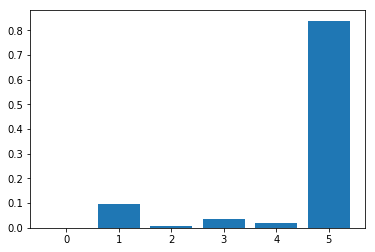

In [138]:
import matplotlib.pyplot as plt


print(model.feature_importances_)

plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

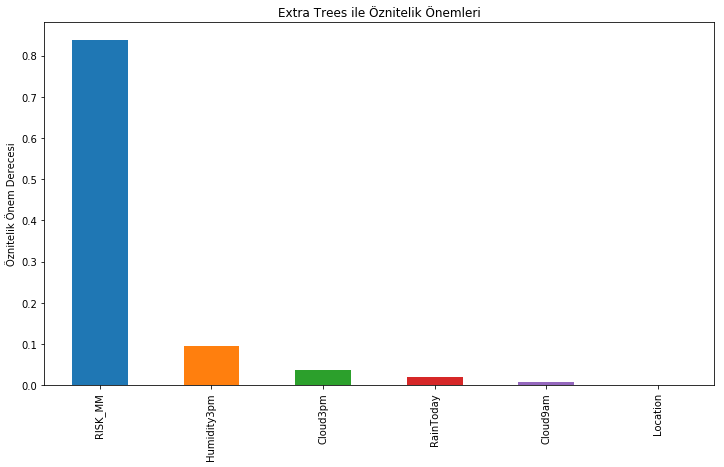

In [139]:

imp_feat= pd.Series(model.feature_importances_, index=names[0:6]).sort_values(ascending=False)
imp_feat.plot(kind='bar', title='Extra Trees ile Öznitelik Önemleri', figsize=(12,8))
plt.ylabel('Öznitelik Önem Derecesi')
plt.subplots_adjust(bottom=0.25)
plt.show()

In [140]:
#from sklearn.model_selection import train_test_split
#x_train, x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0, stratify=Y)

In [141]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)

C:\ProgramData\Anacondaa\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anacondaa\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\ProgramData\Anacondaa\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  """


In [142]:
model1 = LogisticRegression(C=0.0003)
model1.fit(x_train_std, y_train)

y_pred = model1.predict(x_test_std)
y_pred1= model1.predict(x_train_std)

print('eğitim verisi için doğruluk oranı: ',accuracy_score(y_pred1,y_train))
print('\n')
print('test verisi için doğruluk: ',accuracy_score(y_pred,y_test))

C:\ProgramData\Anacondaa\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


eğitim verisi için doğruluk oranı:  0.8879548840178761


test verisi için doğruluk:  0.8905118550088964


In [143]:
for aa in [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10,1000,10000]:
    model=LogisticRegression(C=aa) #her bır deger ıcın donguyu calıstırıyor(c=aa ıle)
    model.fit(x_train_std, y_train)
    y_pred = model.predict(x_test_std)
    y_pred1 = model.predict(x_train_std)
    print("parametre=",aa,'\n')
    print('eğitim verisi için doğruluk oranı: ',accuracy_score(y_pred1,y_train))
    print('test verisi için doğruluk: ',accuracy_score(y_pred,y_test))
    print('\n')

C:\ProgramData\Anacondaa\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


parametre= 0.001 

eğitim verisi için doğruluk oranı:  0.9063985245087607
test verisi için doğruluk:  0.9084288492572516




C:\ProgramData\Anacondaa\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


parametre= 0.01 

eğitim verisi için doğruluk oranı:  0.9459814144853514
test verisi için doğruluk:  0.9461662597757272




C:\ProgramData\Anacondaa\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


parametre= 0.05 

eğitim verisi için doğruluk oranı:  0.9706852521813152
test verisi için doğruluk:  0.9706210948814499




C:\ProgramData\Anacondaa\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


parametre= 0.1 

eğitim verisi için doğruluk oranı:  0.978683407817266
test verisi için doğruluk:  0.9785244341457359




C:\ProgramData\Anacondaa\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


parametre= 0.5 

eğitim verisi için doğruluk oranı:  0.9918422359367242
test verisi için doğruluk:  0.9919725245169032




C:\ProgramData\Anacondaa\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


parametre= 1 

eğitim verisi için doğruluk oranı:  0.9954422926863872
test verisi için doğruluk:  0.9966897008317127




C:\ProgramData\Anacondaa\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


parametre= 5 

eğitim verisi için doğruluk oranı:  0.9999467971908916
test verisi için doğruluk:  1.0




C:\ProgramData\Anacondaa\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


parametre= 10 

eğitim verisi için doğruluk oranı:  0.9999467971908916
test verisi için doğruluk:  1.0




C:\ProgramData\Anacondaa\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


parametre= 1000 

eğitim verisi için doğruluk oranı:  0.9999645314605945
test verisi için doğruluk:  1.0




C:\ProgramData\Anacondaa\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


parametre= 10000 

eğitim verisi için doğruluk oranı:  1.0
test verisi için doğruluk:  1.0




In [144]:

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix

clf = LogisticRegression().fit(x_train_std,y_train)
y_pred = clf.predict(x_test_std)

print('Doğruluk : ' + str(accuracy_score(y_test,y_pred)))
print('Precision : ' + str(precision_score(y_test,y_pred)))
print('Recall : ' + str(recall_score(y_test,y_pred)))
print('F1 Puanı :' + str(f1_score(y_test,y_pred)))
print('\n')
print('Sınıflandırma Tablosu : \n' + str(confusion_matrix(y_test,y_pred)))

C:\ProgramData\Anacondaa\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Doğruluk : 0.9966897008317127
Precision : 1.0
Recall : 0.9861423869738437
F1 Puanı :0.9930228501657072


Sınıflandırma Tablosu : 
[[18394     0]
 [   80  5693]]


In [145]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4) #nyi kucultursek somuc kotulesır. asırı ogrenırç k'yı artırmamız laızm
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred1 = knn.predict(x_train)

print('eğitim verisi için doğruluk oranı: ',accuracy_score(y_pred1,y_train))
print('\n')
print('test verisi için doğruluk: ',accuracy_score(y_pred,y_test))

eğitim verisi için doğruluk oranı:  0.9714478257785344


test verisi için doğruluk:  0.9624694831795424


In [146]:
import time
for a in range(1,8): #'i almaz 10'da bıter.
    tic = time.time() #zamanı ölçüyor. en kısa surece en ıyıyı yakalamak ıcın
    knn = KNeighborsClassifier(n_neighbors=a) #
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    y_pred1 = knn.predict(x_train)
    print("k=",a,'\n')
    print('eğitim verisi için doğruluk oranı: ',accuracy_score(y_pred1,y_train))
    print('test verisi için doğruluk: ',accuracy_score(y_pred,y_test))
    toc = time.time()
    print (toc-tic, "sn. geçti\n")
    print('\n')

k= 1 

eğitim verisi için doğruluk oranı:  1.0
test verisi için doğruluk:  0.9697521413497745
5.988484144210815 sn. geçti



k= 2 

eğitim verisi için doğruluk oranı:  0.9764311555650138
test verisi için doğruluk:  0.9604833036785699
5.324157476425171 sn. geçti



k= 3 

eğitim verisi için doğruluk oranı:  0.9830992409732567
test verisi için doğruluk:  0.968883187818099
5.858717918395996 sn. geçti



k= 4 

eğitim verisi için doğruluk oranı:  0.9714478257785344
test verisi için doğruluk:  0.9624694831795424
9.429215669631958 sn. geçti



k= 5 

eğitim verisi için doğruluk oranı:  0.9756685819677946
test verisi için doğruluk:  0.9674349319319734
10.097882747650146 sn. geçti



k= 6 

eğitim verisi için doğruluk oranı:  0.9681315173441157
test verisi için doğruluk:  0.9625108619191459
5.896931409835815 sn. geçti



k= 7 

eğitim verisi için doğruluk oranı:  0.9711463431935873
test verisi için doğruluk:  0.964828071336947
5.3356709480285645 sn. geçti





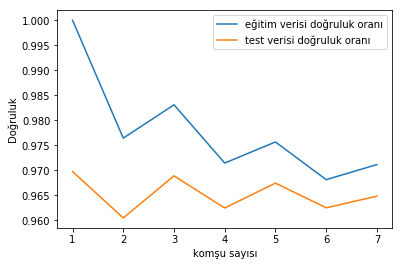

In [147]:
import matplotlib.pyplot as plt
egitim_accuracy = []
test_accuracy = []
komsu_sayisi = range(1, 8)

for a in komsu_sayisi:
    clf = KNeighborsClassifier(n_neighbors=a)
    clf.fit(x_train, y_train)
    egitim_accuracy.append((clf.score(x_train, y_train))) #diziye atamayı append ıle yapıyoruz
    test_accuracy.append((clf.score(x_test, y_test)))

     #grafık cızdırme burada baslıyor   
plt.plot(komsu_sayisi, egitim_accuracy, label="eğitim verisi doğruluk oranı") #1.egrı
plt.plot(komsu_sayisi, test_accuracy, label="test verisi doğruluk oranı") #2.egrı
plt.ylabel("Doğruluk")
plt.xlabel("komşu sayısı")
plt.legend() #grafıktekı sag ust kosedekı kutucuk.
plt.show() #grafıge cevırmek ıcın bız yazdık.

In [148]:
print(test_accuracy)

[0.9697521413497745, 0.9604833036785699, 0.968883187818099, 0.9624694831795424, 0.9674349319319734, 0.9625108619191459, 0.964828071336947]


In [149]:
from sklearn.model_selection import GridSearchCV
grid_değerleri = {'C':[0.0001,.009,0.01,0.05,.09,1,5,10,25]} #ıcıce forları tek bır satırda yapabılıyor.
clf = LogisticRegression(solver='lbfgs')
grid_model = GridSearchCV(clf, param_grid = grid_değerleri, scoring = 'recall')
grid_model.fit(x_train, y_train)

C:\ProgramData\Anacondaa\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anacondaa\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anacondaa\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0001, 0.009, 0.01, 0.05, 0.09, 1, 5, 10, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [150]:
y_pred1 = grid_model.predict(x_test)

print('Doğruluk : ' + str(accuracy_score(y_test,y_pred1)))
print('Precision : ' + str(precision_score(y_test,y_pred1)))
print('Recall : ' + str(recall_score(y_test,y_pred1)))
print('F1 Puanı :' + str(f1_score(y_test,y_pred1)))
print('\n')
print('Sınıflandırma Tablosu : \n' + str(confusion_matrix(y_test,y_pred1)))

Doğruluk : 1.0
Precision : 1.0
Recall : 1.0
F1 Puanı :1.0


Sınıflandırma Tablosu : 
[[18394     0]
 [    0  5773]]


In [151]:
best_parameters = grid_model.best_params_  
print(best_parameters) 

{'C': 0.09}


In [152]:
grid_model.score(x_test, y_test)

1.0

In [153]:
from sklearn.model_selection import cross_val_score

cv_scores = []
model = LogisticRegression()
scores = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')
cv_scores.append(scores.mean())

print(scores)
print("Doğruluk (Accuracy): %.3f%%" % (scores.mean()*100))

C:\ProgramData\Anacondaa\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anacondaa\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anacondaa\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anacondaa\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anacondaa\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Doğruluk (Accuracy): 99.996%


# ROC

In [155]:
from sklearn.metrics import roc_curve
y_scores = model.predict_proba(x_test) 
y_scores = y_scores[:,1]           
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)

NotFittedError: Call fit before prediction

In [159]:
from sklearn.metrics import roc_auc_score
alan = roc_auc_score(y_test, y_scores)
print("ROC Eğrisi Altındaki Alan:", alan)

ROC Eğrisi Altındaki Alan: 0.49856589074066193


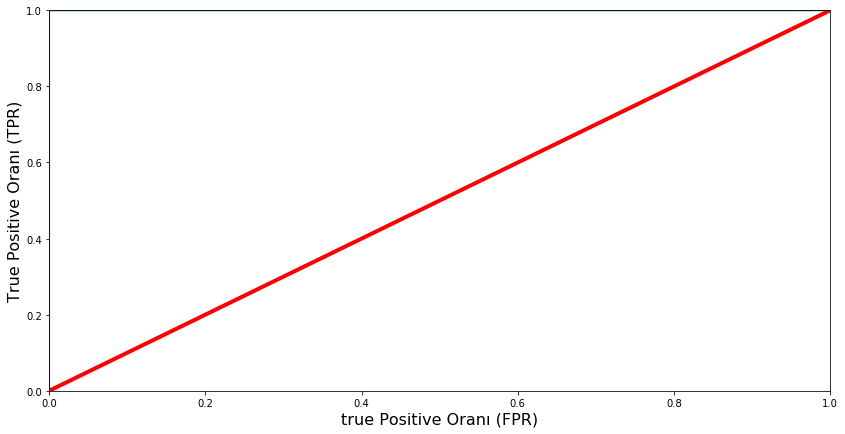

In [160]:
import matplotlib.pyplot as plt
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('true Positive Oranı (FPR)', fontsize=16) 
    plt.ylabel('True Positive Oranı (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()